### Get Data

In [1]:
import pandas as pd


ger_prod = pd.read_csv("../data/ger_production.csv")
ger_ci = pd.read_csv("../data/ger_ci.csv")
ger_prod = ger_prod.rename(columns={"Unnamed: 0": "Time"})

### Visualize relationship of rewnewables and carbon intensity

In [2]:
ger_merged = pd.merge(ger_prod, ger_ci, on="Time")
print(len(ger_merged))
ger_merged.head()

37147


,Time,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,...,CZ,DK,FR,LU,NL,NO,PL,SE,CH,Carbon Intensity
0,2019-12-20 00:00:00,4851.0,6761.0,3573.0,2369.0,446.0,26.0,-3108.0,1176.0,135.0,...,200.0,0.0,3957.0,0.0,402.0,NaN,0.0,0.0,0.0,218.290031
1,2019-12-20 00:15:00,4854.0,6707.0,3558.0,2328.0,446.0,26.0,-3302.0,1178.0,88.0,...,184.0,0.0,3955.0,0.0,648.5,NaN,0.0,0.0,0.0,217.883434
2,2019-12-20 00:30:00,4880.0,6754.0,3510.0,2304.0,446.0,26.0,-3828.0,1183.0,114.0,...,184.0,0.0,3955.0,0.0,648.5,NaN,0.0,0.0,0.0,217.494426
3,2019-12-20 00:45:00,4869.0,6703.0,3533.0,2284.0,446.0,27.0,-4111.0,1188.0,68.0,...,184.0,0.0,3955.0,0.0,648.5,NaN,0.0,0.0,0.0,217.603025
4,2019-12-20 01:00:00,4874.0,6639.0,3565.0,2254.0,446.0,26.0,-3903.0,1201.0,73.0,...,168.0,0.0,3953.0,0.0,895.0,NaN,0.0,0.0,0.0,216.761357


In [3]:
# Mean and std norm for each column
ger_merged_mean_std = ger_merged.copy()
for col in ger_merged_mean_std.columns:
    if col != "Time":
        mean = ger_merged_mean_std[col].mean()
        std = ger_merged_mean_std[col].std()
        ger_merged_mean_std[col] = (ger_merged_mean_std[col] - mean) / std
ger_merged_mean_std.head()

,Time,Biomass,Fossil Brown coal/Lignite,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,...,CZ,DK,FR,LU,NL,NO,PL,SE,CH,Carbon Intensity
0,2019-12-20 00:00:00,1.298447,-0.731377,-1.129219,-0.513085,0.083238,0.707765,-1.114738,-1.687261,0.002218,...,-0.435160,-1.124337,2.014706,-0.019522,-0.416661,NaN,-0.083776,-1.044228,-0.641488,-0.875818
1,2019-12-20 00:15:00,1.313637,-0.745611,-1.134602,-0.525983,0.083238,0.707765,-1.187650,-1.679640,-0.477286,...,-0.469158,-1.124337,2.013103,-0.019522,-0.172472,NaN,-0.083776,-1.044228,-0.641488,-0.879492
2,2019-12-20 00:30:00,1.445283,-0.733222,-1.151827,-0.533533,0.083238,0.707765,-1.385339,-1.660588,-0.212028,...,-0.469158,-1.124337,2.013103,-0.019522,-0.172472,NaN,-0.083776,-1.044228,-0.641488,-0.883007
3,2019-12-20 00:45:00,1.389587,-0.746666,-1.143573,-0.539824,0.083238,0.922038,-1.491700,-1.641537,-0.681331,...,-0.469158,-1.124337,2.013103,-0.019522,-0.172472,NaN,-0.083776,-1.044228,-0.641488,-0.882026
4,2019-12-20 01:00:00,1.414903,-0.763536,-1.132089,-0.549262,0.083238,0.707765,-1.413527,-1.592002,-0.630320,...,-0.503157,-1.124337,2.011501,-0.019522,0.071717,NaN,-0.083776,-1.044228,-0.641488,-0.889632


In [4]:
ger_merged.columns

Index(['Time', 'Biomass', 'Fossil Brown coal/Lignite', 'Fossil Gas',
       'Fossil Hard coal', 'Fossil Oil', 'Geothermal', 'Hydro Pumped Storage',
       'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Nuclear',
       'Other', 'Other renewable', 'Solar', 'Waste', 'Wind Offshore',
       'Wind Onshore', 'AT', 'BE', 'CZ', 'DK', 'FR', 'LU', 'NL', 'NO', 'PL',
       'SE', 'CH', 'Carbon Intensity'],
      dtype='str')

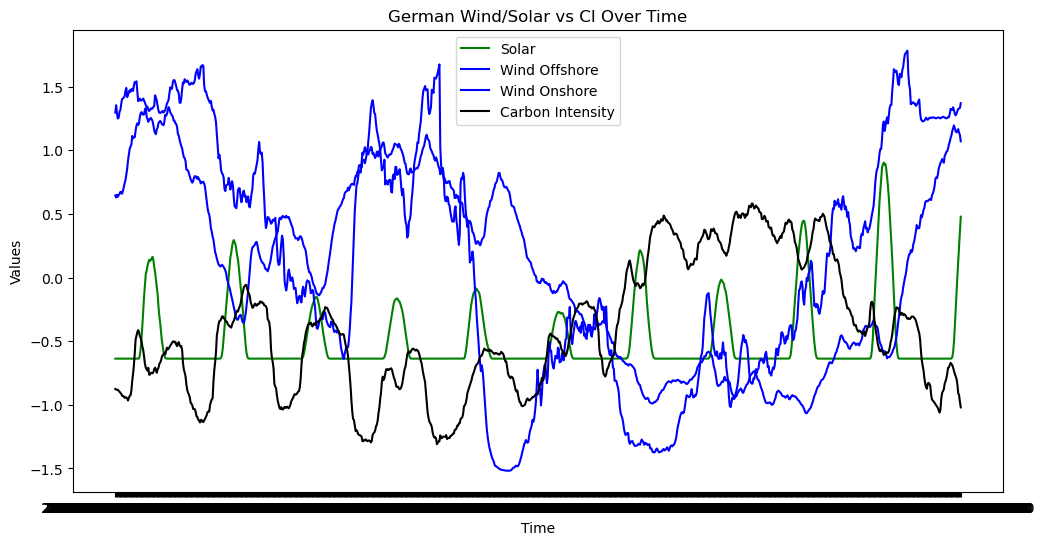

In [5]:
from matplotlib import pyplot as plt

to_plot = 1000
ger_merged_mean_std = ger_merged_mean_std.head(to_plot)

plt.figure(figsize=(12, 6))
plt.plot(ger_merged_mean_std["Time"], ger_merged_mean_std["Solar"], label="Solar", color="green")
plt.plot(ger_merged_mean_std["Time"], ger_merged_mean_std["Wind Offshore"], label="Wind Offshore", color="blue")
plt.plot(ger_merged_mean_std["Time"], ger_merged_mean_std["Wind Onshore"], label="Wind Onshore", color="blue")
plt.plot(ger_merged_mean_std["Time"], ger_merged_mean_std["Carbon Intensity"], label="Carbon Intensity", color="black")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("German Wind/Solar vs CI Over Time")
plt.legend()
plt.show()

### Correlation Analysis of Renewables and Carbon Intensity

#### Pearson Correlation

In [6]:
import pandas as pd

target = "Carbon Intensity"

# Ensure numeric
ger_merged[target] = pd.to_numeric(ger_merged[target], errors="coerce")

num = ger_merged.select_dtypes(include="number")
features = [c for c in num.columns if c != target]

rows = []
for col in features:
    tmp = ger_merged[[col, target]].dropna()
    if len(tmp) < 2:
        corr = float("nan")
        std = float("nan")
    else:
        corr = tmp[col].corr(tmp[target])  # Pearson
        std = tmp[col].std()

    rows.append({
        "Energy Source": col,
        "Corr with CI": corr,
        "Std": std
    })

corr_df = pd.DataFrame(rows)

# Absolute correlation
corr_df["|Corr with CI|"] = corr_df["Corr with CI"].abs()

# Ranks (1 = strongest / largest)
corr_df["Corr Rank"] = corr_df["|Corr with CI|"].rank(
    ascending=False, method="min"
).astype("Int64")

corr_df["Std Rank"] = corr_df["Std"].rank(
    ascending=False, method="min"
).astype("Int64")

# Sort by absolute correlation strength
corr_df = corr_df.sort_values("|Corr with CI|", ascending=False).reset_index(drop=True)

corr_df

,Energy Source,Corr with CI,Std,|Corr with CI|,Corr Rank,Std Rank
0,Fossil Brown coal/Lignite,0.889316,3793.581597,0.889316,1,3
1,Fossil Gas,0.807951,2786.512612,0.807951,2,5
2,Fossil Hard coal,0.746485,3178.838680,0.746485,3,4
3,Wind Onshore,-0.618361,9132.293409,0.618361,4,1
4,Wind Offshore,-0.419544,2011.167159,0.419544,5,7
5,CZ,0.405171,470.612057,0.405171,6,13
6,Other,0.391273,115.642382,0.391273,7,21
7,Other renewable,0.383565,27.453479,0.383565,8,25
8,AT,0.312130,469.955713,0.312130,9,14
9,Solar,-0.308362,7817.558789,0.308362,10,2
